<a href="https://colab.research.google.com/github/yeqinghuang516/UCSD-ECE285-Object-Detection-Using-Deep-Learning/blob/master/MaskRCNN/MaskRCNN_Detect_Demo_Sageband.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This notebook is suggested to run on Colab

## Download Github Repo

In [0]:
%%shell
# Download TorchVision repo to use some files from references/detection
git clone https://github.com/pytorch/vision.git
cd vision
git checkout v0.3.0

cp references/detection/utils.py ../
cp references/detection/transforms.py ../
cp references/detection/coco_eval.py ../
cp references/detection/engine.py ../
cp references/detection/coco_utils.py ../

# Download files from our own project repo
cd ..
git clone https://github.com/yeqinghuang516/UCSD-ECE285-Object-Detection-Using-Deep-Learning.git

In [0]:
import os
import sys
sys.path.append('/content/UCSD-ECE285-Object-Detection-Using-Deep-Learning/Mask RCNN/')
sys.path.append('/content/UCSD-ECE285-Object-Detection-Using-Deep-Learning/')
sys.path.append('/content/')
import torch
from PIL import Image
import torchvision as tv
from model import *
from download_weights import download_file_from_google_drive
from detect import *

## Define device

In [0]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

## Download and initiate dataset

In [0]:
os.makedirs('data', exist_ok = True)
root = 'data'
testset = tv.datasets.VOCSegmentation(root, year = '2012', image_set = 'val')

## Download pretrained weight from Google Drive

In [0]:
file_id = '11zztmZ88FZvAIYl0-z8yR4Xr23kDfbNJ'
destination = '/content/UCSD-ECE285-Object-Detection-Using-Deep-Learning/Mask RCNN/maskrcnn_weight.pth'
download_file_from_google_drive(file_id, destination)
pretrained_weights = '/content/UCSD-ECE285-Object-Detection-Using-Deep-Learning/Mask RCNN/maskrcnn_weight.pth'

## Initiate model and load pretrained weights

In [9]:
# our dataset has 21 classes, 20 object class + 1 background
num_classes = 21

# get the model using our helper function
model = MaskRCNN(num_classes)
# move model to the right device
model.to(device)

if os.path.isfile(pretrained_weights):  
  checkpoint = torch.load(pretrained_weights)
  model.load_state_dict(checkpoint['net'])
  print('load state dict')

load state dict


## Detecting

<Figure size 432x288 with 0 Axes>

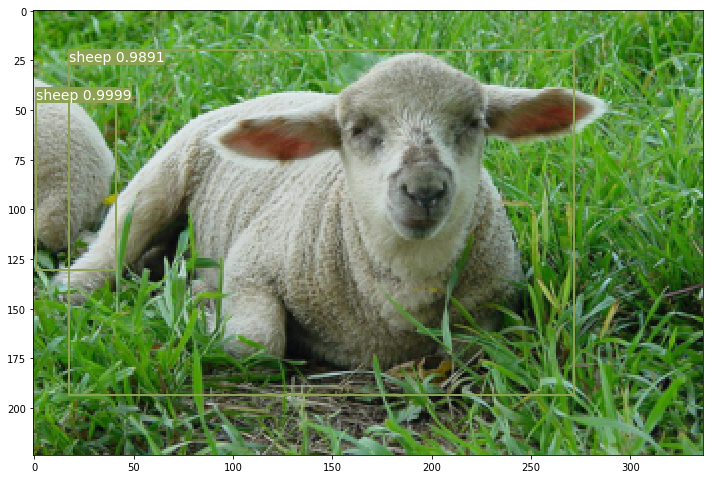

In [10]:
img, _ = testset[5]
Detect(img, model)